<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r14_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r14-good.csv?token=AKVFSOGYFVMAWK7MD7JXW4S6X3R6I"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r14-mal.csv?token=AKVFSOBQMSJLIJEBLXXH2Z26X3R6E"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [223]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,824,0,3,1,1,4,3,9,0,0,30,14,8,5,5,1.0,24,1,1,1,1,1,0,1,4,32,3,27,9,1
1,862,4,0,4,1,1,5,17,30,14,0,0,8,5,0,0.0,4,1,1,1,1,1,0,4,4,32,20,85,100,1
2,863,4,0,4,2,2,5,17,30,14,0,0,8,5,0,0.0,5,1,1,1,1,1,0,8,16,128,20,85,100,1
3,864,4,0,4,3,2,5,17,30,14,0,0,8,5,0,0.0,6,1,1,1,1,1,0,12,24,192,20,85,100,1
4,865,4,0,4,4,2,5,17,30,14,0,0,8,5,0,0.0,7,1,1,1,1,1,0,16,32,256,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16846,3250536,4,0,4,1,1,5,17,30,14,0,0,10017,5,0,0.0,4,1,1,1,1,1,0,4,4,40068,20,85,100,1
16847,3250537,4,0,4,2,2,5,17,30,14,0,0,10017,5,0,0.0,5,1,1,1,1,1,0,8,16,160272,20,85,100,1
16848,3250538,4,0,4,3,2,5,17,30,14,0,0,10017,5,0,0.0,6,1,1,1,1,1,0,12,24,240408,20,85,100,1
16849,3250539,4,0,4,4,2,5,17,30,14,0,0,10017,5,0,0.0,7,1,1,1,1,1,0,16,32,320544,20,85,100,1


In [224]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,768,0,3,1,1,4,3,9,1,1,30,14,16,4,4,1.0,20,1,1,1,1,1,0,1,4,64,3,27,9,0
1,806,4,0,4,1,1,5,17,30,14,1,1,16,4,0,0.0,4,1,1,1,1,1,0,4,4,64,20,85,100,0
2,807,4,0,4,2,2,5,17,30,14,1,1,16,4,0,0.0,5,1,1,1,1,1,0,8,16,256,20,85,100,0
3,808,4,0,4,3,2,5,17,30,14,1,1,16,4,0,0.0,6,1,1,1,1,1,0,12,24,384,20,85,100,0
4,809,4,0,4,4,2,5,17,30,14,1,1,16,4,0,0.0,7,1,1,1,1,1,0,16,32,512,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17236,2009864,4,0,4,2,2,5,18,30,14,0,0,11071,5,0,0.0,6,1,1,1,1,1,0,8,16,177136,20,90,100,0
17237,2009865,4,0,4,3,2,5,18,30,14,0,0,11071,5,0,0.0,7,1,1,1,1,1,0,12,24,265704,20,90,100,0
17238,2009866,4,0,4,4,2,5,18,30,14,0,0,11071,5,0,0.0,8,1,1,1,1,1,0,16,32,354272,20,90,100,0
17239,2009870,4,0,4,5,3,5,18,30,14,0,0,11071,5,0,0.0,12,1,1,1,1,1,0,20,60,664260,20,90,100,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [226]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [228]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,768,0,3,1,1,4,3,9,1,1,30,14,16,4,4,1.0,20,1,1,1,1,1,0,1,4,64,3,27,9,0
1,806,4,0,4,1,1,5,17,30,14,1,1,16,4,0,0.0,4,1,1,1,1,1,0,4,4,64,20,85,100,0
2,807,4,0,4,2,2,5,17,30,14,1,1,16,4,0,0.0,5,1,1,1,1,1,0,8,16,256,20,85,100,0
3,808,4,0,4,3,2,5,17,30,14,1,1,16,4,0,0.0,6,1,1,1,1,1,0,12,24,384,20,85,100,0
4,809,4,0,4,4,2,5,17,30,14,1,1,16,4,0,0.0,7,1,1,1,1,1,0,16,32,512,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34087,3250536,4,0,4,1,1,5,17,30,14,0,0,10017,5,0,0.0,4,1,1,1,1,1,0,4,4,40068,20,85,100,1
34088,3250537,4,0,4,2,2,5,17,30,14,0,0,10017,5,0,0.0,5,1,1,1,1,1,0,8,16,160272,20,85,100,1
34089,3250538,4,0,4,3,2,5,17,30,14,0,0,10017,5,0,0.0,6,1,1,1,1,1,0,12,24,240408,20,85,100,1
34090,3250539,4,0,4,4,2,5,17,30,14,0,0,10017,5,0,0.0,7,1,1,1,1,1,0,16,32,320544,20,85,100,1


In [229]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.033871,0.051619,0.039931,0.009990,-0.015209,-0.028578,-0.031032,0.013337,0.005961,0.028098,0.025509,0.822942,-0.004637,0.014267,0.041796,0.034279,-0.392952,-0.392945,-0.472682,-0.372185,-0.288721,-0.020064,0.024788,0.018186,0.432385,0.011860,-0.029672,-0.013390,0.421019
outport,-0.033871,1.000000,-0.689104,-0.372773,-0.026585,0.040498,0.827929,0.838887,0.368309,0.387138,-0.910683,-0.924131,-0.040190,0.667066,-0.581340,-0.803513,-0.723360,-0.051521,0.129655,0.046994,0.027905,0.010361,0.138841,-0.259140,-0.183382,-0.160825,0.362862,0.834706,0.721709,-0.006001
inport,0.051619,-0.689104,1.000000,0.150429,-0.097687,0.148811,-0.669264,-0.725580,-0.366416,-0.417408,0.672924,0.662212,0.055080,-0.293901,0.659385,0.891467,0.611198,-0.020862,-0.161714,-0.109811,-0.094561,-0.067976,0.281202,0.053956,0.049113,0.075762,-0.429295,-0.695032,-0.647646,0.013448
cache_coherence_type,0.039931,-0.372773,0.150429,1.000000,0.265623,-0.404638,-0.344639,-0.352356,0.087110,0.086705,0.221146,0.238496,0.047444,-0.306026,0.028590,0.209518,0.052083,0.018879,-0.045338,-0.015914,-0.003652,0.003810,-0.094685,0.523839,0.407696,0.322764,0.610179,-0.348809,0.059253,0.007893
flit_id,0.009990,-0.026585,-0.097687,0.265623,1.000000,-0.006268,0.205653,0.171038,-0.010737,-0.008567,-0.108975,-0.095023,0.012011,0.058853,-0.019986,-0.015579,0.326534,-0.022214,0.065060,0.025771,-0.000840,-0.001040,-0.259044,0.934887,0.900370,0.670085,0.412903,0.191374,0.331776,0.000622
flit_type,-0.015209,0.040498,0.148811,-0.404638,-0.006268,1.000000,-0.313282,-0.260551,0.016357,0.013051,0.166007,0.144753,-0.018297,-0.089654,0.030446,0.023732,0.259675,-0.007570,0.022582,0.009029,0.006485,0.005864,0.394615,-0.072104,0.188729,0.135365,-0.628997,-0.291530,-0.505412,-0.000948
vnet,-0.028578,0.827929,-0.669264,-0.344639,0.205653,-0.313282,1.000000,0.974219,0.289321,0.305288,-0.922301,-0.917057,-0.033780,0.675616,-0.501469,-0.675861,-0.564715,-0.045479,0.130444,0.051103,0.024884,0.007803,-0.184558,-0.048899,-0.075780,-0.078470,0.533434,0.991505,0.916665,-0.006245
vc,-0.031032,0.838887,-0.725580,-0.352356,0.171038,-0.260551,0.974219,1.000000,0.317025,0.335598,-0.917621,-0.911695,-0.035503,0.642670,-0.543742,-0.736882,-0.581721,-0.036162,0.142251,0.063808,0.040307,0.021041,-0.180695,-0.079058,-0.091768,-0.092783,0.504723,0.994382,0.885965,-0.007844
src_ni,0.013337,0.368309,-0.366416,0.087110,-0.010737,0.016357,0.289321,0.317025,1.000000,0.995287,-0.323217,-0.329040,0.012119,-0.312706,-0.917637,-0.448505,-0.595591,-0.045596,0.055244,0.005803,0.005419,-0.002936,0.081046,-0.001326,0.012425,0.014648,0.322668,0.301896,0.344748,0.007291
src_router,0.005961,0.387138,-0.417408,0.086705,-0.008567,0.013051,0.305288,0.335598,0.995287,1.000000,-0.344378,-0.349237,0.006279,-0.298761,-0.930767,-0.471416,-0.609059,-0.036841,0.062296,0.015310,0.013308,0.003335,0.072658,-0.003545,0.011273,0.009870,0.335778,0.319018,0.361554,0.002750


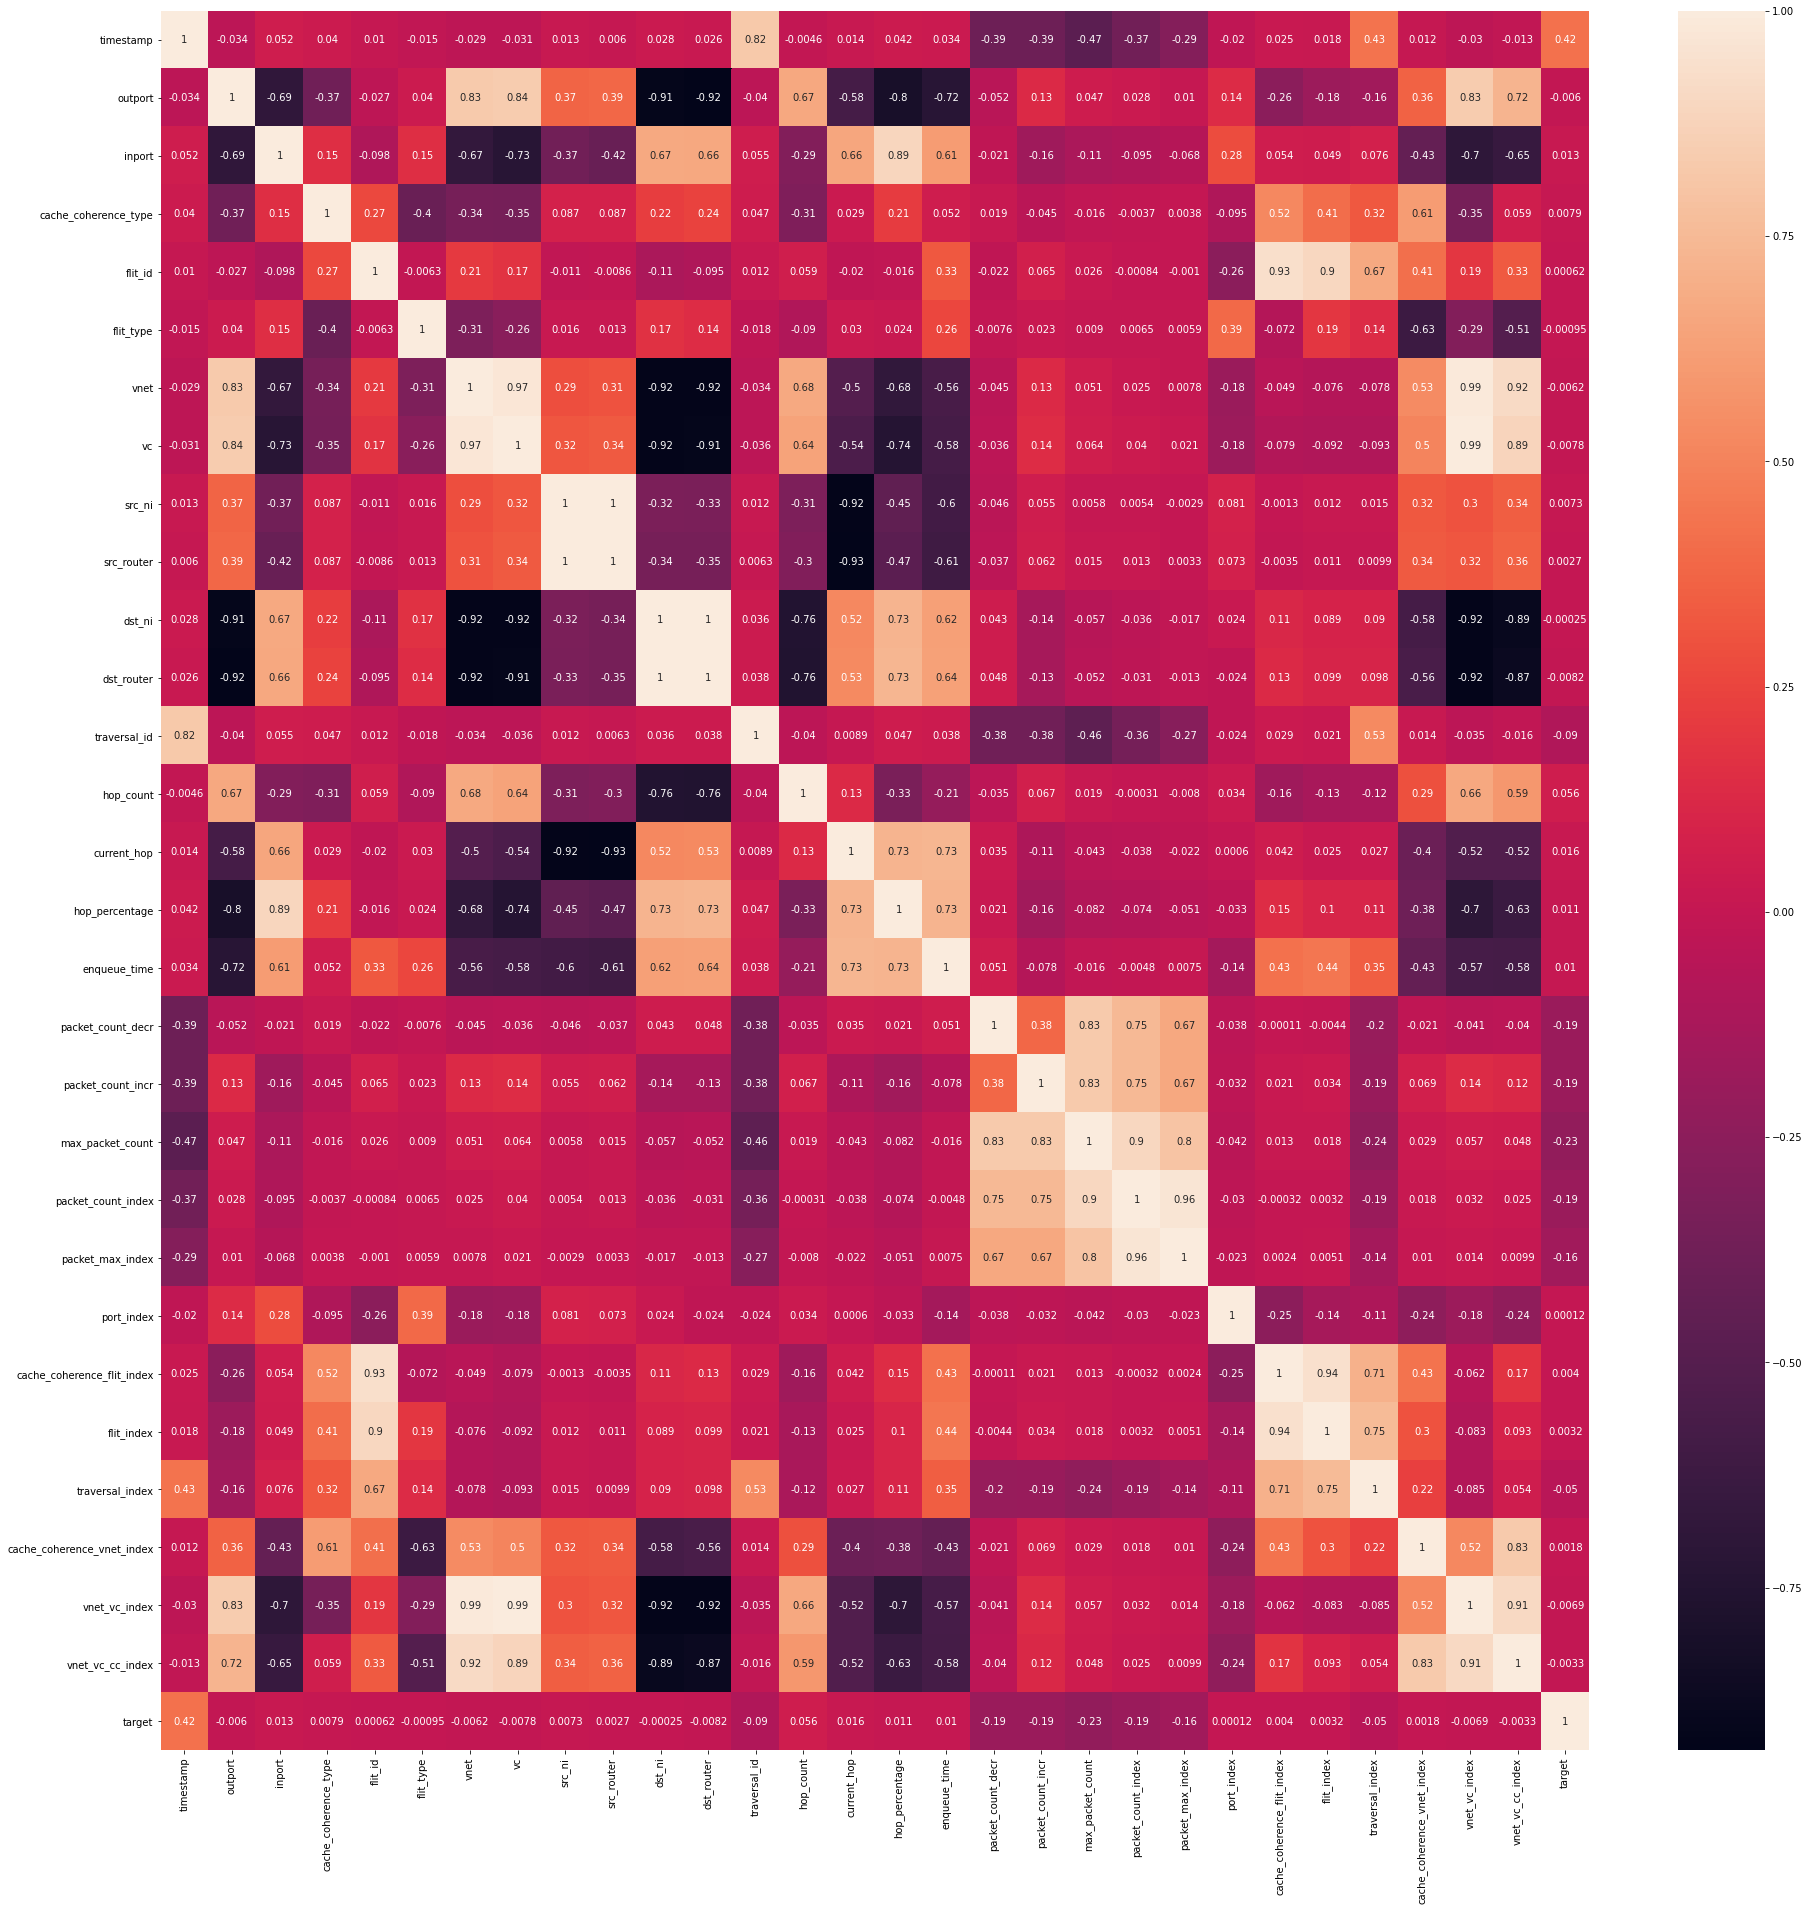

In [230]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [231]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0,3,1,1,4,3,9,30,14,16,4,4,1.0,20,1,1,1,1,1,0,1,4,64,3,27,9
1,4,0,4,1,1,5,17,1,1,16,4,0,0.0,4,1,1,1,1,1,0,4,4,64,20,85,100
2,4,0,4,2,2,5,17,1,1,16,4,0,0.0,5,1,1,1,1,1,0,8,16,256,20,85,100
3,4,0,4,3,2,5,17,1,1,16,4,0,0.0,6,1,1,1,1,1,0,12,24,384,20,85,100
4,4,0,4,4,2,5,17,1,1,16,4,0,0.0,7,1,1,1,1,1,0,16,32,512,20,85,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34087,4,0,4,1,1,5,17,0,0,10017,5,0,0.0,4,1,1,1,1,1,0,4,4,40068,20,85,100
34088,4,0,4,2,2,5,17,0,0,10017,5,0,0.0,5,1,1,1,1,1,0,8,16,160272,20,85,100
34089,4,0,4,3,2,5,17,0,0,10017,5,0,0.0,6,1,1,1,1,1,0,12,24,240408,20,85,100
34090,4,0,4,4,2,5,17,0,0,10017,5,0,0.0,7,1,1,1,1,1,0,16,32,320544,20,85,100


In [232]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.0,0.75,0.0,0.00,1.000000,0.0,0.000000,0.967742,0.933333,0.000723,0.666667,0.8,1.0,0.271186,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000032,0.000000,0.000000,0.0
1,1.0,0.00,0.5,0.00,0.000000,1.0,0.727273,0.032258,0.066667,0.000723,0.666667,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.103448,0.000000,0.000032,0.944444,0.794521,1.0
2,1.0,0.00,0.5,0.25,0.333333,1.0,0.727273,0.032258,0.066667,0.000723,0.666667,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.0,0.0,0.241379,0.139535,0.000225,0.944444,0.794521,1.0
3,1.0,0.00,0.5,0.50,0.333333,1.0,0.727273,0.032258,0.066667,0.000723,0.666667,0.0,0.0,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.379310,0.232558,0.000353,0.944444,0.794521,1.0
4,1.0,0.00,0.5,0.75,0.333333,1.0,0.727273,0.032258,0.066667,0.000723,0.666667,0.0,0.0,0.050847,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,0.325581,0.000482,0.944444,0.794521,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34087,1.0,0.00,0.5,0.00,0.000000,1.0,0.727273,0.000000,0.000000,0.904074,0.833333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.103448,0.000000,0.040186,0.944444,0.794521,1.0
34088,1.0,0.00,0.5,0.25,0.333333,1.0,0.727273,0.000000,0.000000,0.904074,0.833333,0.0,0.0,0.016949,0.0,0.0,0.0,0.0,0.0,0.0,0.241379,0.139535,0.160840,0.944444,0.794521,1.0
34089,1.0,0.00,0.5,0.50,0.333333,1.0,0.727273,0.000000,0.000000,0.904074,0.833333,0.0,0.0,0.033898,0.0,0.0,0.0,0.0,0.0,0.0,0.379310,0.232558,0.241276,0.944444,0.794521,1.0
34090,1.0,0.00,0.5,0.75,0.333333,1.0,0.727273,0.000000,0.000000,0.904074,0.833333,0.0,0.0,0.050847,0.0,0.0,0.0,0.0,0.0,0.0,0.517241,0.325581,0.321713,0.944444,0.794521,1.0


In [233]:
train_X[train_X.duplicated()].shape

(148, 26)

In [234]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.689104,-0.372773,-0.026585,0.040498,0.827929,0.838887,-0.910683,-0.924131,-0.040190,0.667066,-0.581340,-0.803513,-0.723360,-0.051521,0.129655,0.046994,0.027905,0.010361,0.138841,-0.259140,-0.183382,-0.160825,0.362862,0.834706,0.721709,-0.006001
inport,-0.689104,1.000000,0.150429,-0.097687,0.148811,-0.669264,-0.725580,0.672924,0.662212,0.055080,-0.293901,0.659385,0.891467,0.611198,-0.020862,-0.161714,-0.109811,-0.094561,-0.067976,0.281202,0.053956,0.049113,0.075762,-0.429295,-0.695032,-0.647646,0.013448
cache_coherence_type,-0.372773,0.150429,1.000000,0.265623,-0.404638,-0.344639,-0.352356,0.221146,0.238496,0.047444,-0.306026,0.028590,0.209518,0.052083,0.018879,-0.045338,-0.015914,-0.003652,0.003810,-0.094685,0.523839,0.407696,0.322764,0.610179,-0.348809,0.059253,0.007893
flit_id,-0.026585,-0.097687,0.265623,1.000000,-0.006268,0.205653,0.171038,-0.108975,-0.095023,0.012011,0.058853,-0.019986,-0.015579,0.326534,-0.022214,0.065060,0.025771,-0.000840,-0.001040,-0.259044,0.934887,0.900370,0.670085,0.412903,0.191374,0.331776,0.000622
flit_type,0.040498,0.148811,-0.404638,-0.006268,1.000000,-0.313282,-0.260551,0.166007,0.144753,-0.018297,-0.089654,0.030446,0.023732,0.259675,-0.007570,0.022582,0.009029,0.006485,0.005864,0.394615,-0.072104,0.188729,0.135365,-0.628997,-0.291530,-0.505412,-0.000948
vnet,0.827929,-0.669264,-0.344639,0.205653,-0.313282,1.000000,0.974219,-0.922301,-0.917057,-0.033780,0.675616,-0.501469,-0.675861,-0.564715,-0.045479,0.130444,0.051103,0.024884,0.007803,-0.184558,-0.048899,-0.075780,-0.078470,0.533434,0.991505,0.916665,-0.006245
vc,0.838887,-0.725580,-0.352356,0.171038,-0.260551,0.974219,1.000000,-0.917621,-0.911695,-0.035503,0.642670,-0.543742,-0.736882,-0.581721,-0.036162,0.142251,0.063808,0.040307,0.021041,-0.180695,-0.079058,-0.091768,-0.092783,0.504723,0.994382,0.885965,-0.007844
dst_ni,-0.910683,0.672924,0.221146,-0.108975,0.166007,-0.922301,-0.917621,1.000000,0.997907,0.036206,-0.756117,0.523243,0.725584,0.623066,0.042542,-0.137668,-0.057214,-0.035547,-0.016971,0.023932,0.112947,0.088735,0.089645,-0.579131,-0.922632,-0.886617,-0.000248
dst_router,-0.924131,0.662212,0.238496,-0.095023,0.144753,-0.917057,-0.911695,0.997907,1.000000,0.037757,-0.758750,0.527730,0.731794,0.635171,0.047527,-0.133362,-0.051626,-0.030678,-0.012949,-0.024313,0.129199,0.099331,0.098051,-0.559072,-0.917083,-0.873653,-0.008220
traversal_id,-0.040190,0.055080,0.047444,0.012011,-0.018297,-0.033780,-0.035503,0.036206,0.037757,1.000000,-0.040125,0.008893,0.046652,0.037681,-0.379124,-0.379083,-0.456028,-0.356482,-0.274326,-0.023591,0.029183,0.021472,0.527100,0.014240,-0.034576,-0.015723,-0.089988


Principal Component Analysis

In [235]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-1.34486485, -0.96078541, -0.49352537, ...,  0.52900696,
        -0.37906482,  0.08510936],
       [ 1.49982151, -0.48269056, -0.180213  , ...,  0.33943383,
         0.08178496, -0.06690717],
       [ 1.48119048, -0.25065483, -0.0709867 , ...,  0.36762361,
         0.09540171, -0.10382439],
       ...,
       [ 1.53121511,  0.08367335, -0.11085914, ..., -0.41016714,
        -0.10736895,  0.06382278],
       [ 1.53090145,  0.35320573, -0.07075559, ..., -0.40033581,
        -0.12289204,  0.05526478],
       [ 1.49723655,  0.72892831,  0.07096211, ..., -0.44030761,
        -0.11307049,  0.03288018]])

In [236]:
pca.explained_variance_ratio_

array([0.59608151, 0.1318707 , 0.07663446, 0.06417722, 0.03735963,
       0.03183311, 0.02218662])

Text(0, 0.5, 'Variance')

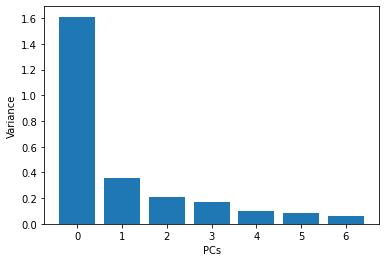

In [237]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [238]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-1.344865,-0.960785,-0.493525,-0.634393,0.529007,-0.379065,0.085109
1,1.499822,-0.482691,-0.180213,0.489710,0.339434,0.081785,-0.066907
2,1.481190,-0.250655,-0.070987,0.158755,0.367624,0.095402,-0.103824
3,1.482097,0.001895,-0.035490,0.069985,0.399254,0.082916,-0.114610
4,1.483004,0.254444,0.000007,-0.018784,0.430884,0.070430,-0.125395
...,...,...,...,...,...,...,...
34087,1.551991,-0.443369,-0.267099,0.444020,-0.415490,-0.100907,0.105957
34088,1.531529,-0.185859,-0.150963,0.099816,-0.419998,-0.091846,0.072381
34089,1.531215,0.083673,-0.110859,0.002214,-0.410167,-0.107369,0.063823
34090,1.530901,0.353206,-0.070756,-0.095388,-0.400336,-0.122892,0.055265


In [239]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,1.103624e-14,1.889156e-16,-8.265986e-16,-1.500050e-16,1.174839e-15,-3.737904e-17,-0.003396
1,1.103624e-14,1.000000e+00,4.168877e-16,-1.476904e-15,3.355420e-16,-6.705206e-16,-5.180507e-16,-0.001036
2,1.889156e-16,4.168877e-16,1.000000e+00,4.470999e-17,4.065899e-16,-1.640418e-15,1.788784e-15,-0.033938
3,-8.265986e-16,-1.476904e-15,4.470999e-17,1.000000e+00,-4.717423e-17,-1.367767e-15,-1.294868e-16,-0.008699
4,-1.500050e-16,3.355420e-16,4.065899e-16,-4.717423e-17,1.000000e+00,1.568969e-15,-2.074941e-17,0.013522
5,1.174839e-15,-6.705206e-16,-1.640418e-15,-1.367767e-15,1.568969e-15,1.000000e+00,-9.221272e-16,0.030119
6,-3.737904e-17,-5.180507e-16,1.788784e-15,-1.294868e-16,-2.074941e-17,-9.221272e-16,1.000000e+00,0.024194
target,-3.395642e-03,-1.036220e-03,-3.393765e-02,-8.698726e-03,1.352227e-02,3.011893e-02,2.419381e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

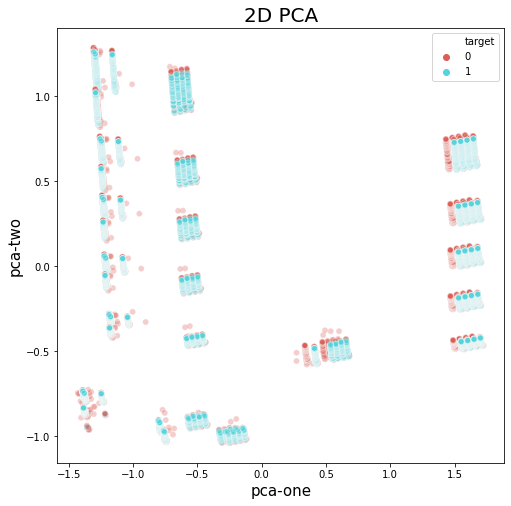

In [241]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

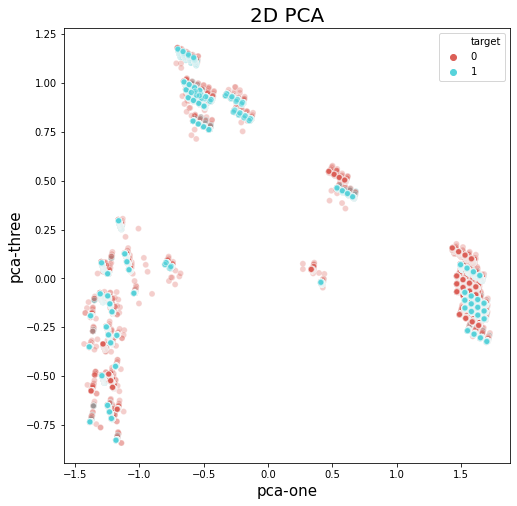

In [242]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

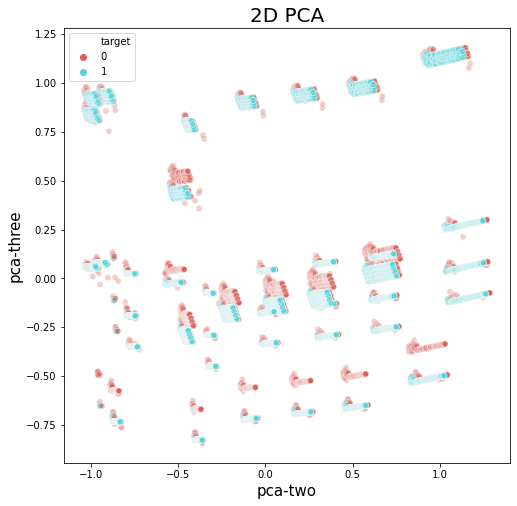

In [243]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

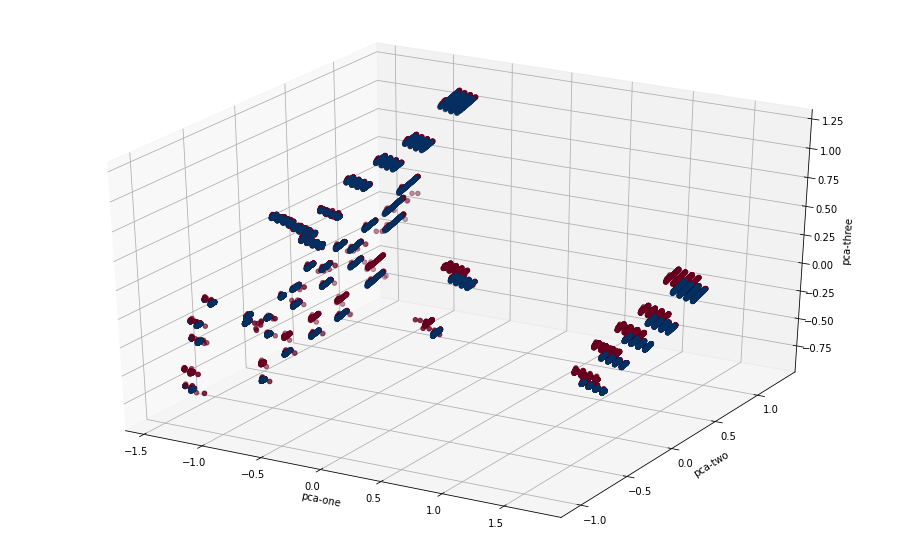

In [244]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

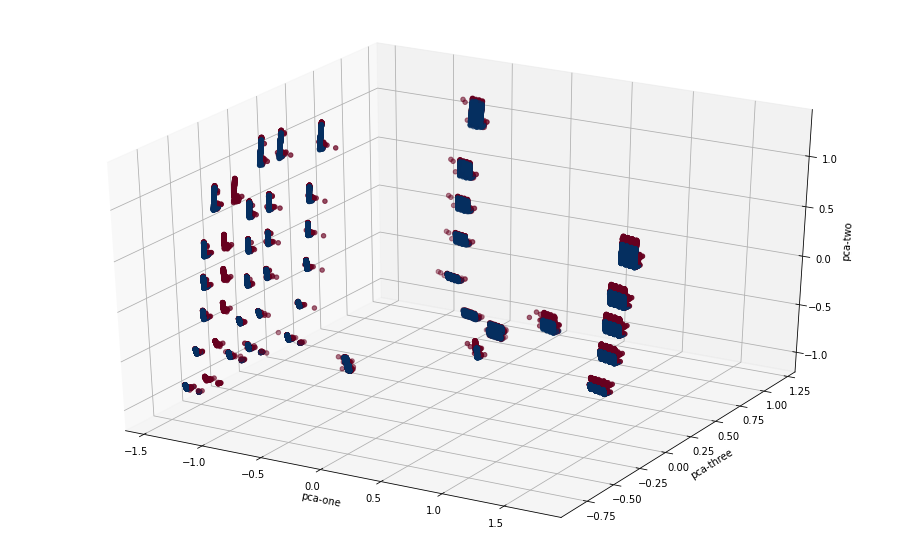

In [245]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

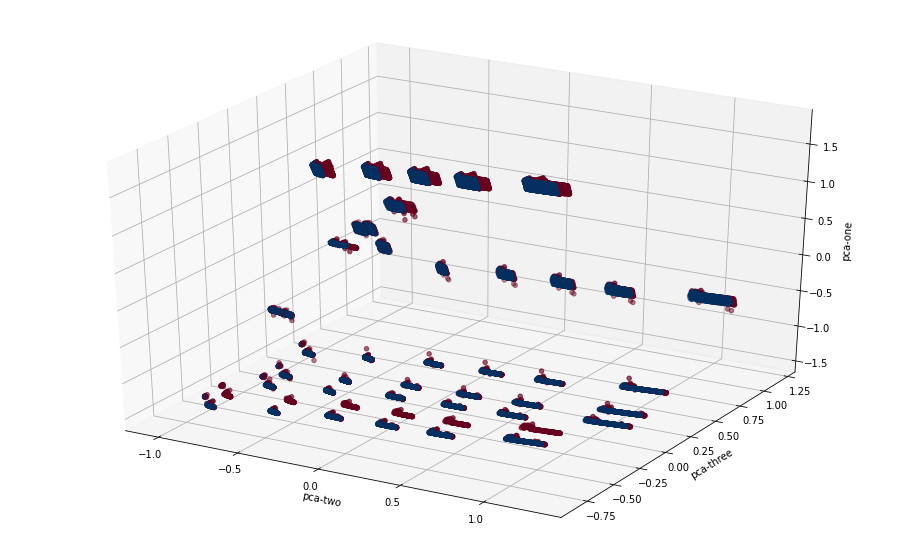

In [246]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [247]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 105.20394587516785 seconds


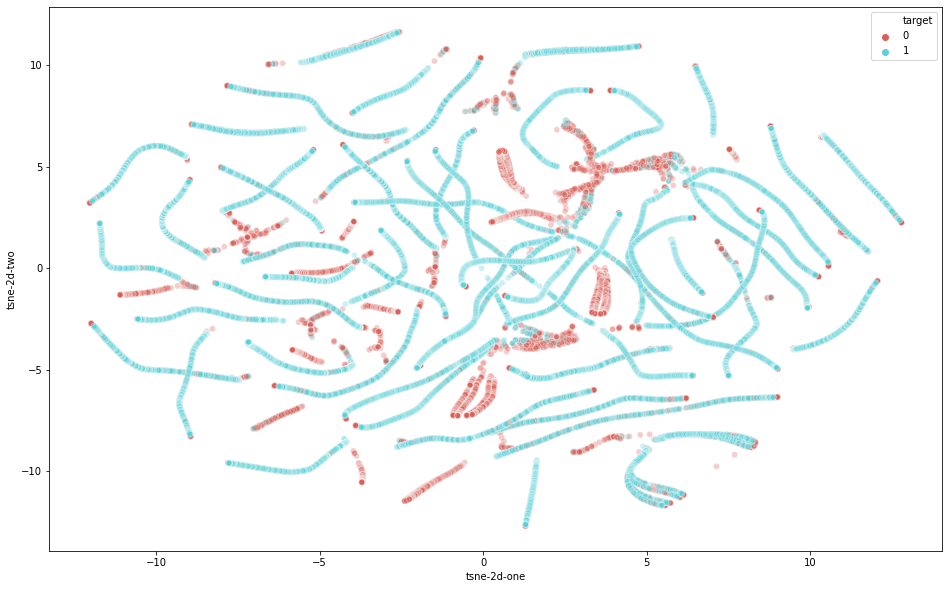

In [248]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

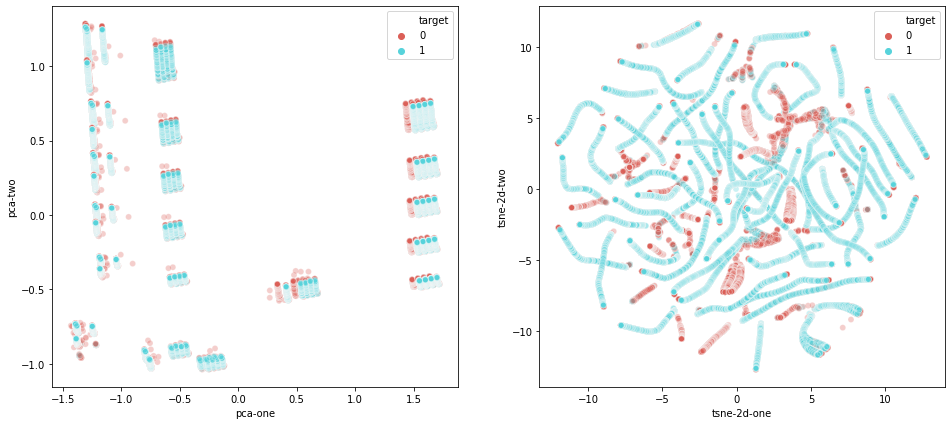

In [249]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [250]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 97.94561982154846 seconds


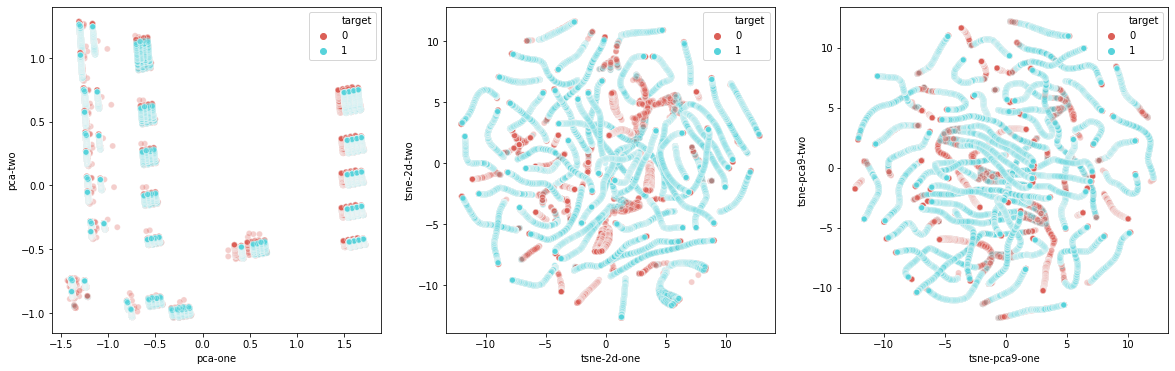

In [251]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [253]:
train_Y = df['target']
train_Y.value_counts()

0    17241
1    16851
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs       Score
16    max_packet_count  549.573204
15   packet_count_incr  276.574295
14   packet_count_decr  273.018340
17  packet_count_index  245.605491
18    packet_max_index  161.480252
9         traversal_id   39.055461
10           hop_count   17.372007
22     traversal_index   14.801033
11         current_hop    4.708065
1               inport    4.366322
12      hop_percentage    3.276229
6                   vc    1.359255
24       vnet_vc_index    1.248292
5                 vnet    1.222558
0              outport    1.209491
13        enqueue_time    1.186348
8           dst_router    0.288707


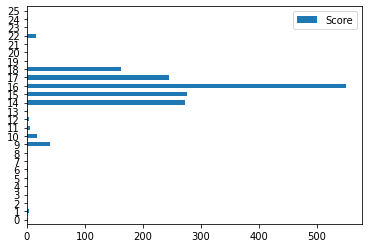

In [256]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [259]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [260]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 68.2249844168225
Test Prediction  68.89573251209855


In [261]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,17.281614
10,hop_count,13.003079
18,packet_max_index,4.148368
13,enqueue_time,2.422006
6,vc,2.418047
23,cache_coherence_vnet_index,1.116445
25,vnet_vc_cc_index,0.954651
2,cache_coherence_type,0.821053
5,vnet,0.664631
17,packet_count_index,0.580863


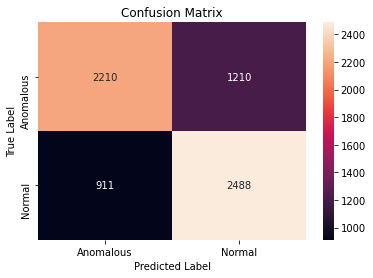

In [262]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [263]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      3420
           1       0.67      0.73      0.70      3399

    accuracy                           0.69      6819
   macro avg       0.69      0.69      0.69      6819
weighted avg       0.69      0.69      0.69      6819



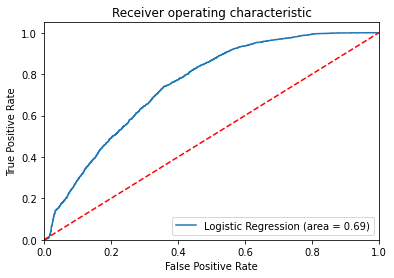

In [264]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [265]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [267]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 79.73453598797346
Test Prediction  70.1569145035929


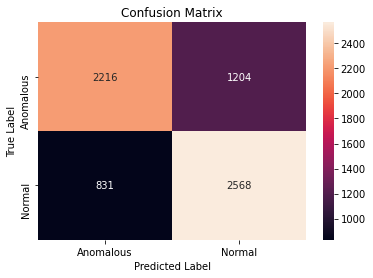

In [268]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [269]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      3420
           1       0.68      0.76      0.72      3399

    accuracy                           0.70      6819
   macro avg       0.70      0.70      0.70      6819
weighted avg       0.70      0.70      0.70      6819



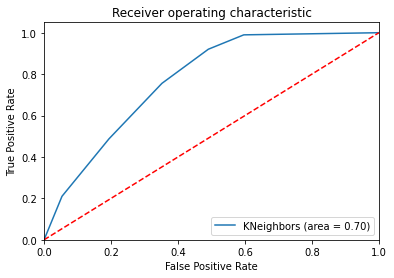

In [270]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [272]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [274]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 56.979430205697945
Test Prediction Score 58.67429241824315


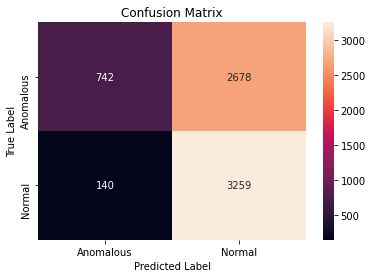

In [275]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [276]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.84      0.22      0.34      3420
           1       0.55      0.96      0.70      3399

    accuracy                           0.59      6819
   macro avg       0.70      0.59      0.52      6819
weighted avg       0.70      0.59      0.52      6819



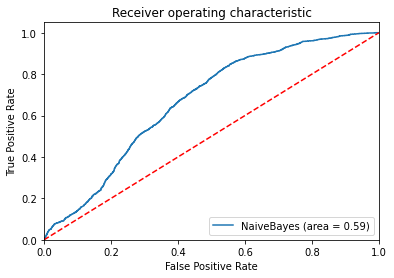

In [277]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [279]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 21818 samples, validate on 5455 samples
Epoch 1/10
21818/21818 [==============================] - 1s 43us/step - loss: 0.2494 - accuracy: 0.5333 - val_loss: 0.2478 - val_accuracy: 0.5375
Epoch 2/10
21818/21818 [==============================] - 1s 39us/step - loss: 0.2446 - accuracy: 0.5766 - val_loss: 0.2417 - val_accuracy: 0.5899
Epoch 3/10
21818/21818 [==============================] - 1s 40us/step - loss: 0.2375 - accuracy: 0.6109 - val_loss: 0.2352 - val_accuracy: 0.6185
Epoch 4/10
21818/21818 [==============================] - 1s 40us/step - loss: 0.2310 - accuracy: 0.6298 - val_loss: 0.2292 - val_accuracy: 0.6381
Epoch 5/10
21818/21818 [==============================] - 1s 43us/step - loss: 0.2260 - accuracy: 0.6406 - val_loss: 0.2252 - val_accuracy: 0.6458
Epoch 6/10
21818/21818 [==============================] - 1s 39us/step - loss: 0.2213 - accuracy: 0.6469 - val_loss: 0.2199 - val_accuracy: 0.6561
Epoch 7/10
21818/21818 [==============================] - 1s 38us/ste

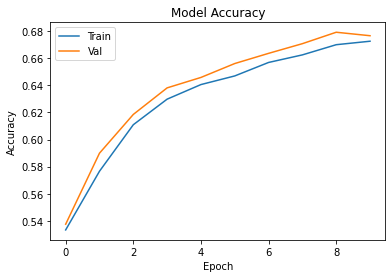

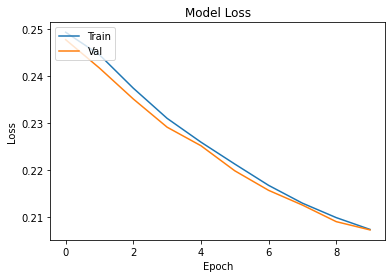

In [280]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [281]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.43%


3-Layer Neural Network

In [282]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 21818 samples, validate on 5455 samples
Epoch 1/15
21818/21818 [==============================] - 1s 40us/step - loss: 0.2494 - accuracy: 0.5098 - val_loss: 0.2490 - val_accuracy: 0.5072
Epoch 2/15
21818/21818 [==============================] - 1s 38us/step - loss: 0.2492 - accuracy: 0.5127 - val_loss: 0.2488 - val_accuracy: 0.5098
Epoch 3/15
21818/21818 [==============================] - 1s 38us/step - loss: 0.2491 - accuracy: 0.5125 - val_loss: 0.2486 - val_accuracy: 0.5105
Epoch 4/15
21818/21818 [==============================] - 1s 38us/step - loss: 0.2490 - accuracy: 0.5132 - val_loss: 0.2485 - val_accuracy: 0.5116
Epoch 5/15
21818/21818 [==============================] - 1s 37us/step - loss: 0.2489 - accuracy: 0.5132 - val_loss: 0.2484 - val_accuracy: 0.5151
Epoch 6/15
21818/21818 [==============================] - 1s 38us/step - loss: 0.2488 - accuracy: 0.5147 - val_loss: 0.2482 - val_accuracy: 0.5157
Epoch 7/15
21818/21818 [==============================] - 1s 38us/ste

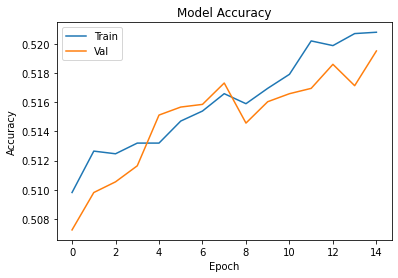

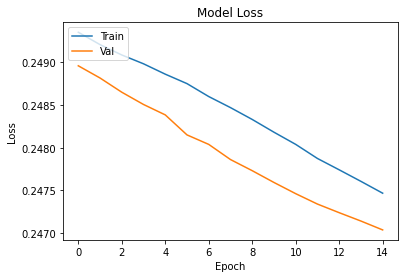

In [283]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [284]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 52.27%


4-Layer Neural Network



In [285]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 21818 samples, validate on 5455 samples
Epoch 1/30
21818/21818 [==============================] - 1s 40us/step - loss: 0.2510 - accuracy: 0.5058 - val_loss: 0.2502 - val_accuracy: 0.4997
Epoch 2/30
21818/21818 [==============================] - 1s 38us/step - loss: 0.2504 - accuracy: 0.4964 - val_loss: 0.2501 - val_accuracy: 0.5076
Epoch 3/30
21818/21818 [==============================] - 1s 40us/step - loss: 0.2503 - accuracy: 0.4985 - val_loss: 0.2500 - val_accuracy: 0.5065
Epoch 4/30
21818/21818 [==============================] - 1s 38us/step - loss: 0.2502 - accuracy: 0.4969 - val_loss: 0.2499 - val_accuracy: 0.5061
Epoch 5/30
21818/21818 [==============================] - 1s 38us/step - loss: 0.2501 - accuracy: 0.4957 - val_loss: 0.2498 - val_accuracy: 0.5058
Epoch 6/30
21818/21818 [==============================] - 1s 38us/step - loss: 0.2500 - accuracy: 0.4977 - val_loss: 0.2497 - val_accuracy: 0.5074
Epoch 7/30
21818/21818 [==============================] - 1s 38us/ste

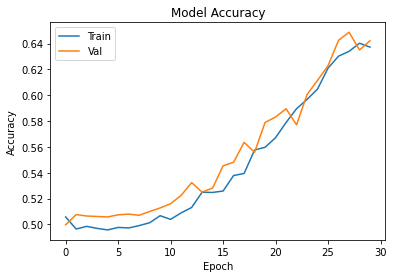

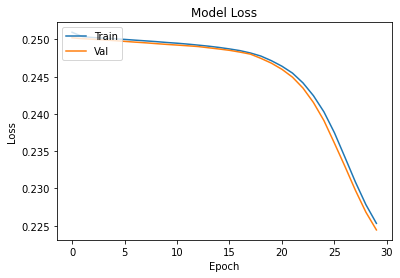

In [286]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [287]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 63.97%


5-Layer Neural Network Optimized

In [288]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 21818 samples, validate on 5455 samples
Epoch 1/100
21818/21818 [==============================] - 2s 105us/step - loss: 0.2245 - accuracy: 0.6062 - val_loss: 0.2144 - val_accuracy: 0.6253
Epoch 2/100
21818/21818 [==============================] - 2s 74us/step - loss: 0.2019 - accuracy: 0.6742 - val_loss: 0.2062 - val_accuracy: 0.6601
Epoch 3/100
21818/21818 [==============================] - 2s 72us/step - loss: 0.1971 - accuracy: 0.6833 - val_loss: 0.2536 - val_accuracy: 0.6180
Epoch 4/100
21818/21818 [==============================] - 2s 71us/step - loss: 0.1945 - accuracy: 0.6885 - val_loss: 0.1874 - val_accuracy: 0.7067
Epoch 5/100
21818/21818 [==============================] - 2s 72us/step - loss: 0.1914 - accuracy: 0.6948 - val_loss: 0.2085 - val_accuracy: 0.6704
Epoch 6/100
21818/21818 [==============================] - 2s 73us/step - loss: 0.1906 - accuracy: 0.6988 - val_loss: 0.1850 - val_accuracy: 0.7047
Epoch 7/100
21818/21818 [==============================] - 2s 

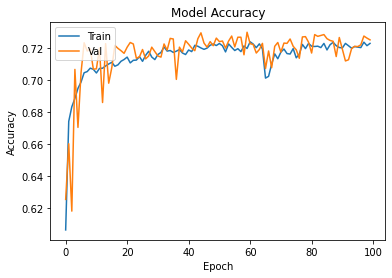

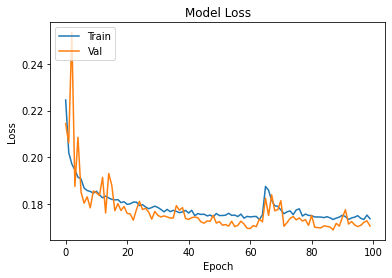

In [289]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [290]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.37%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [292]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8163385032816338


In [293]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [295]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.72371942947237
Test Prediction Score 88.78134623845139


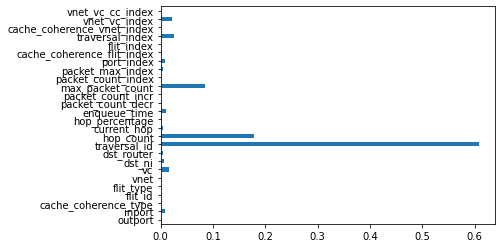

In [296]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

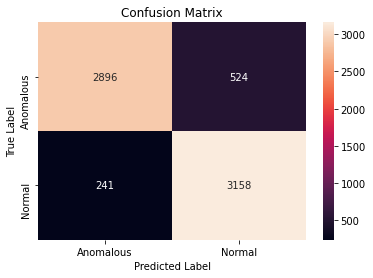

In [297]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [298]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      3420
           1       0.86      0.93      0.89      3399

    accuracy                           0.89      6819
   macro avg       0.89      0.89      0.89      6819
weighted avg       0.89      0.89      0.89      6819



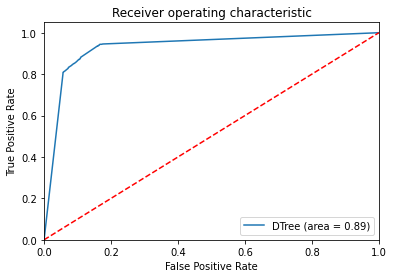

In [299]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [302]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [304]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 99.37667289993767
Test Prediction Score 89.38260742044288


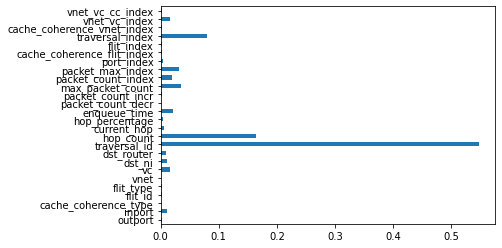

In [305]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

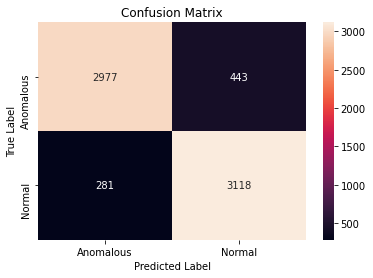

In [306]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [307]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      3420
           1       0.88      0.92      0.90      3399

    accuracy                           0.89      6819
   macro avg       0.89      0.89      0.89      6819
weighted avg       0.89      0.89      0.89      6819



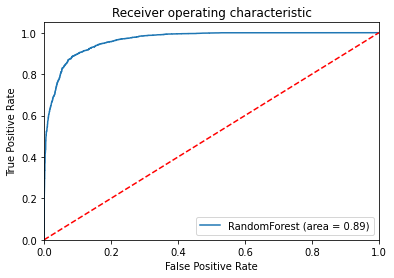

In [308]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [311]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [313]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.55267113995527
Test Prediction Score 93.89939873881801


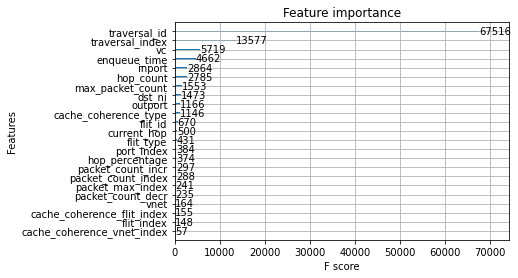

In [314]:
plot_importance(xgbc)
plt.show()

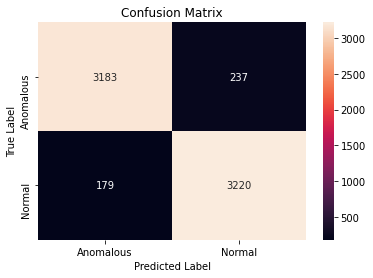

In [315]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [316]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3420
           1       0.93      0.95      0.94      3399

    accuracy                           0.94      6819
   macro avg       0.94      0.94      0.94      6819
weighted avg       0.94      0.94      0.94      6819



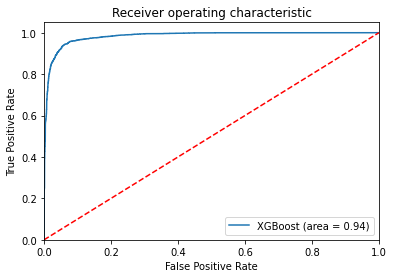

In [317]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [320]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [322]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.51780148865178
Test Prediction Score 77.1814048980789


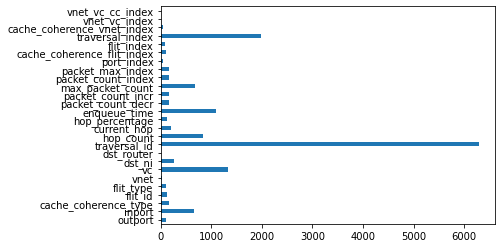

In [323]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

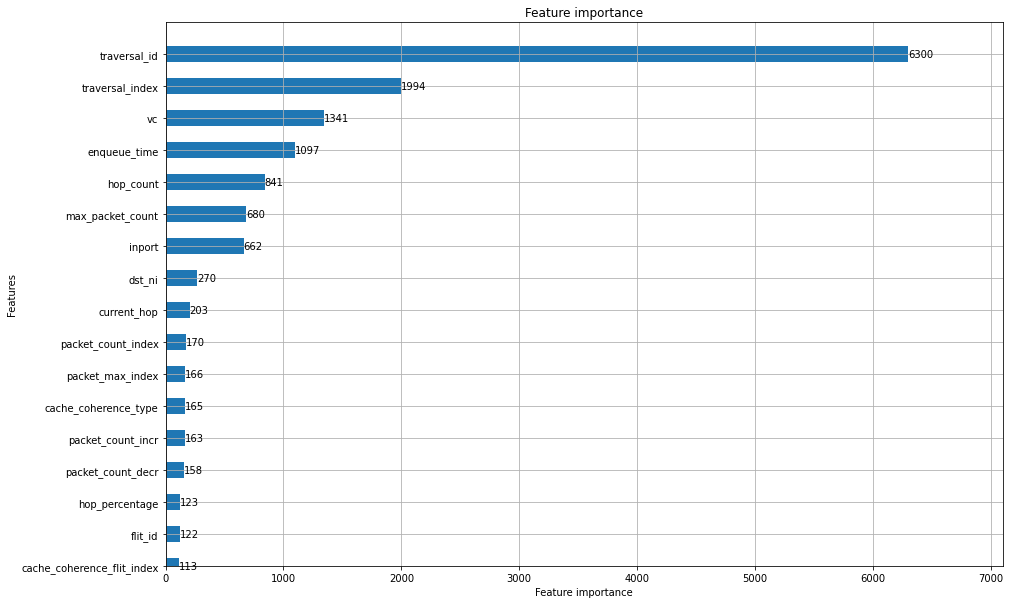

In [324]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [325]:
sorted(gbm.feature_importances_,reverse=True)

[6300,
 1994,
 1341,
 1097,
 841,
 680,
 662,
 270,
 203,
 170,
 166,
 165,
 163,
 158,
 123,
 122,
 113,
 109,
 105,
 92,
 47,
 44,
 33,
 2,
 0,
 0]

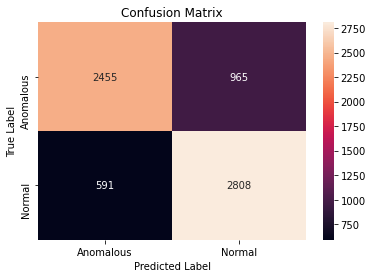

In [326]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [327]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      3420
           1       0.74      0.83      0.78      3399

    accuracy                           0.77      6819
   macro avg       0.78      0.77      0.77      6819
weighted avg       0.78      0.77      0.77      6819



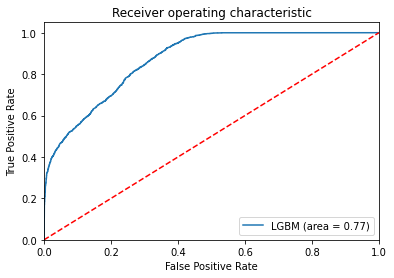

In [329]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()